<a href="https://www.kaggle.com/code/pruthvikmachhi/classification-using-knn-dt-rf-svm-adaboost?scriptVersionId=174280325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif


In [95]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [96]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['target']= label_encoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [98]:
df=df.drop(['Species'],axis=1)

In [99]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [100]:
y=df['target']
y=pd.DataFrame(y,columns=["target"])
y


,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   target         150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [102]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: >

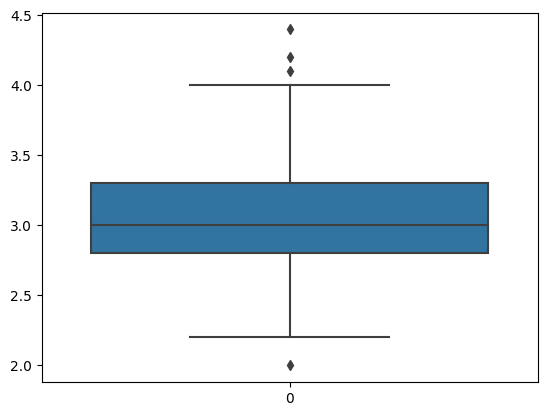

In [103]:
sns.boxplot(df["SepalWidthCm"])

/tmp/ipykernel_33/411063035.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]
 [15.9]]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.clip(df.quantile(0.1),df.quantile(0.9),axis=1,inplace=True)


<Axes: >

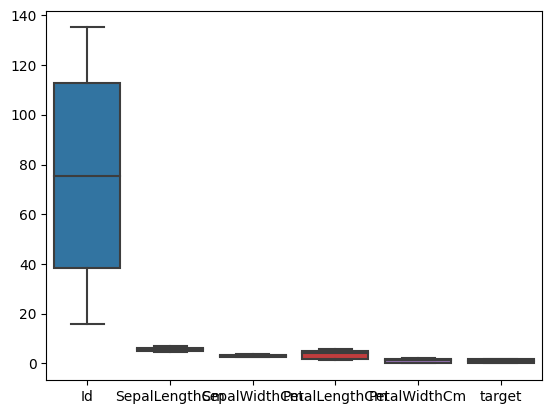

In [104]:
df.clip(df.quantile(0.1),df.quantile(0.9),axis=1,inplace=True)
sns.boxplot(df)

<Axes: >

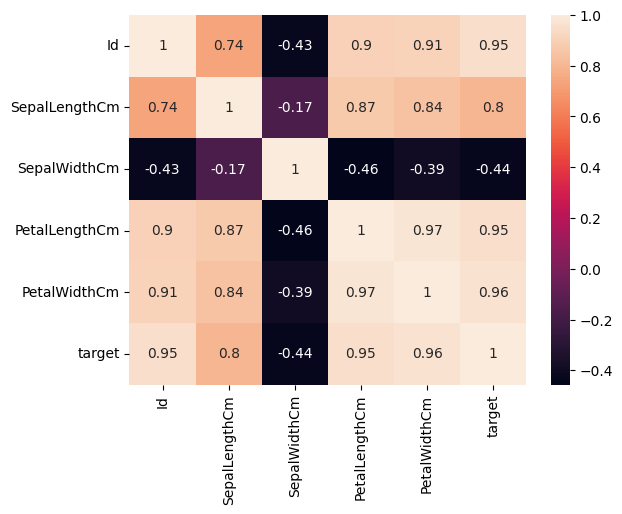

In [105]:
sns.heatmap(df.corr(),annot=True)

In [106]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,15.9,5.1,3.5,1.4,0.2,0
1,15.9,4.9,3.0,1.4,0.2,0
2,15.9,4.8,3.2,1.4,0.2,0
3,15.9,4.8,3.1,1.5,0.2,0
4,15.9,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,135.1,6.7,3.0,5.2,2.2,2
146,135.1,6.3,2.5,5.0,1.9,2
147,135.1,6.5,3.0,5.2,2.0,2
148,135.1,6.2,3.4,5.4,2.2,2


In [107]:
col=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=df[col]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.8,3.2,1.4,0.2
3,4.8,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.2
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.2


In [108]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df1=st.fit_transform(x)
X=pd.DataFrame(x,columns=col)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.8,3.2,1.4,0.2
3,4.8,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.2
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.2


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(3)

In [111]:
model=k.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [112]:
a=model.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,a)

In [114]:
accuracy

1.0

In [115]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC

In [116]:
model=DecisionTreeClassifier(criterion='gini')

In [117]:
a=model.fit(X_train,y_train)

In [118]:
y_pred=model.predict(X_test)

In [119]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [120]:
accuracy_score(y_test,y_pred)

1.0

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
s=SVC()
parameter={'C':[0.1,10,100,0.01],"kernel":['rbf','linear','poly'],'gamma':['scale','auto']}
g1=GridSearchCV(s,parameter,cv=4)

In [125]:
g1.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [126]:
para1=g1.best_params_
para1

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

In [127]:
s1=SVC(**para1)

In [128]:
s1.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='poly')

In [129]:
y_prred = s1.predict(X_test)
y_prred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [130]:
accuracy_score(y_test,y_prred)

1.0

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],               # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']             # Function to measure the quality of a split
}
g2=GridSearchCV(rf,param_grid,cv=2)

In [132]:
# g2.fit(X_train,y_train)

In [133]:
# para2=g2.best_params_
# para2

In [134]:
# rf1.fit(X_train,y_train)

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0] }      

ada_classifier = AdaBoostClassifier()

grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)  

best_params = grid_search.best_params_

best_ada_classifier = AdaBoostClassifier(**best_params)

best_ada_classifier.fit(X_train, y_train) 

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AdaBoostClassifier(n_estimators=100)

In [136]:
y_preda=best_ada_classifier.predict(X_test)

In [137]:
accuracy_score(y_test,y_preda)

1.0